<a href="https://colab.research.google.com/github/Litzu10/python1/blob/master/Transfer_learning_0609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning

In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

### Cifar10

讀入cifar10資料

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
(x_train, y_train0), (x_test, y_test0) = datasets.cifar10.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

查看資料

Text(0.5, 1.0, 'horse')

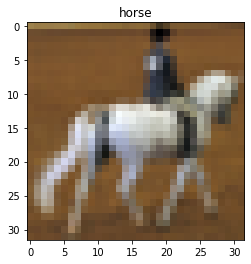

In [11]:
pic = np.random.randint(x_train.shape[0])
x_sample = x_train[pic]
y_sample = y_train0[pic].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])

In [12]:
print('Train Size:', x_train.shape)
print('Test Size:', x_test.shape)

Train Size: (50000, 32, 32, 3)
Test Size: (10000, 32, 32, 3)


### Model

In [0]:
CNN_layers = [Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(128, (3, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(256, (3, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(512, (3, 3), padding='same', activation='relu'),
           GlobalAveragePooling2D()]

In [0]:
FC_layers1 = [Dense(512, activation='relu'),
              Dense(10, activation='softmax')]

In [15]:
model = Sequential(CNN_layers+FC_layers1)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

訓練model

In [17]:
history = model.fit( x_train, y_train, batch_size=200, epochs=10, validation_data=(x_test, y_test) )

Epoch 1/10
250/250 [==============================] - 11s 46ms/step - loss: 1.7286 - accuracy: 0.3480 - val_loss: 1.4935 - val_accuracy: 0.4433
Epoch 2/10
250/250 [==============================] - 11s 45ms/step - loss: 1.3013 - accuracy: 0.5197 - val_loss: 1.2258 - val_accuracy: 0.5596
Epoch 3/10
250/250 [==============================] - 11s 45ms/step - loss: 1.0809 - accuracy: 0.6115 - val_loss: 1.0216 - val_accuracy: 0.6377
Epoch 4/10
250/250 [==============================] - 11s 45ms/step - loss: 0.9386 - accuracy: 0.6667 - val_loss: 0.8786 - val_accuracy: 0.6874
Epoch 5/10
250/250 [==============================] - 11s 46ms/step - loss: 0.8213 - accuracy: 0.7076 - val_loss: 0.8621 - val_accuracy: 0.6954
Epoch 6/10
250/250 [==============================] - 11s 45ms/step - loss: 0.7320 - accuracy: 0.7398 - val_loss: 0.7840 - val_accuracy: 0.7282
Epoch 7/10
250/250 [==============================] - 11s 45ms/step - loss: 0.6583 - accuracy: 0.7680 - val_loss: 0.7271 - val_accuracy:

準確率

In [18]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 2s 7ms/step - loss: 0.6687 - accuracy: 0.7721
Train Accuracy: 87.06200122833252
Test Accuracy: 77.20999717712402


Accuracy、Loss圖形

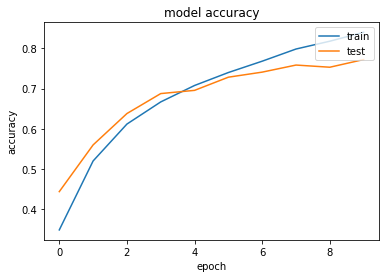

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

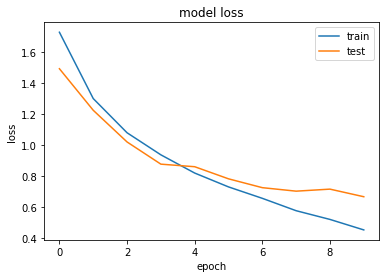

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Cifar100


讀入cifar100資料

In [0]:
(X_train, Y_train0), (X_test, Y_test0) = datasets.cifar100.load_data()

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

Y_train = to_categorical(Y_train0, 100)
Y_test = to_categorical(Y_test0, 100)

查看資料

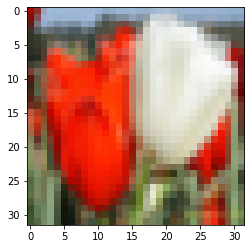

In [77]:
pic1 = np.random.randint(X_train.shape[0])
X_sample = X_train[pic1]
Y_sample = Y_train0[pic1].squeeze()

plt.imshow(X_sample)

In [60]:
print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)

Train Size: (50000, 32, 32, 3)
Test Size: (10000, 32, 32, 3)


和model借CNN_layers並凍結

In [0]:
for layer in CNN_layers:
    layer.trainable = False

建一個屬於model_trans的FC_layers

In [0]:
FC_layers2 = [Dense(512, activation='relu'),
              Dense(256, activation='relu'),
              Dense(100, activation='softmax')]

### Model_trans

In [66]:
model_trans = Sequential(CNN_layers+FC_layers2)
model_trans.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)        

In [0]:
model_trans.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

訓練model_trans

In [68]:
history_trans = model_trans.fit( X_train, Y_train, batch_size=200, epochs=10, validation_data=(X_test, Y_test) )

Epoch 1/10
250/250 [==============================] - 6s 22ms/step - loss: 3.3550 - accuracy: 0.1961 - val_loss: 2.9282 - val_accuracy: 0.2648
Epoch 2/10
250/250 [==============================] - 5s 21ms/step - loss: 2.7869 - accuracy: 0.2948 - val_loss: 2.7164 - val_accuracy: 0.3145
Epoch 3/10
250/250 [==============================] - 5s 21ms/step - loss: 2.6180 - accuracy: 0.3302 - val_loss: 2.6057 - val_accuracy: 0.3315
Epoch 4/10
250/250 [==============================] - 5s 21ms/step - loss: 2.4996 - accuracy: 0.3549 - val_loss: 2.5404 - val_accuracy: 0.3483
Epoch 5/10
250/250 [==============================] - 5s 21ms/step - loss: 2.4104 - accuracy: 0.3724 - val_loss: 2.4978 - val_accuracy: 0.3591
Epoch 6/10
250/250 [==============================] - 5s 22ms/step - loss: 2.3317 - accuracy: 0.3905 - val_loss: 2.4482 - val_accuracy: 0.3699
Epoch 7/10
250/250 [==============================] - 6s 22ms/step - loss: 2.2667 - accuracy: 0.4027 - val_loss: 2.4281 - val_accuracy: 0.3738

準確率

In [70]:
trans_score_train = model_trans.evaluate(X_train, Y_train)
trans_score_test = model_trans.evaluate(X_test, Y_test)

print(f'Train Accuracy: {trans_score_train[1]*100}')
print(f'Test Accuracy: {trans_score_test[1]*100}')

313/313 [==============================] - 3s 8ms/step - loss: 2.3680 - accuracy: 0.3922
Train Accuracy: 46.12799882888794
Test Accuracy: 39.21999931335449


Accuracy、Loss圖形

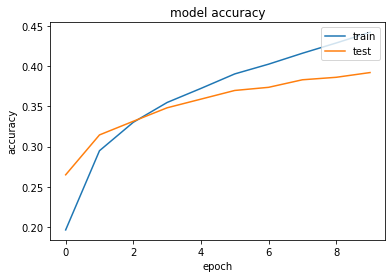

In [71]:
plt.plot(history_trans.history['accuracy'])
plt.plot(history_trans.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

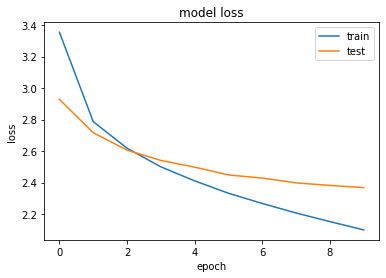

In [72]:
plt.plot(history_trans.history['loss'])
plt.plot(history_trans.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()